# EDA

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#set seed for reproducibility
random.seed(72)

In [3]:
#import data
#original data set hosted on Kaggle at https://www.kaggle.com/ntnu-testimon/paysim1 
#for detailed overview of dataset see conference paper at https://www.researchgate.net/publication/313138956_PAYSIM_A_FINANCIAL_MOBILE_MONEY_SIMULATOR_FOR_FRAUD_DETECTION 
#all data contained in a single downloaded CSV file
fraud_detection = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')

In [5]:
#basic info of data
print(fraud_detection.shape)
print('-------------------------------------------------------------------------------------------------------------')
print(fraud_detection.info())
print('-------------------------------------------------------------------------------------------------------------')
print(fraud_detection.head())

(6362620, 11)
-------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
-------------------------------------------------------------------------------------------------------------
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0  

# Recap from Data Wrangling work and next EDA steps

From the intial analysis in the Data Wrangling notebook, the data set was found to contain 11 columns with no missing values. All columns are of the proper data type and no anomalies were identified.

We found that the sender and recipient are over 99.9% unique and that fraudulent transactions only rarely involve the same party multiple times.

The trasaction type is very important for fraud detection, since only the types CASH_OUT and TRANSFER are linked to any fraudulent activity. Subsetting the data for only these transaction types, potential features of interest contained directly in the data set identified by a pair plot grouped by the label (isFraud) point to step, amount, oldbalanceOrg, newbalanceOrg, oldbalanceDest, and newbalanceDest.

The column isFlaggedFraud is based on a simple criterion of a transaction amount exceeding 200,000 currency units, and hence can be dropped. 

In [5]:
#drop isFlaggedFraud
fraud_detection.drop(columns='isFlaggedFraud',inplace=True)

In [6]:
#only use CASH_OUT and TRANSFER transaction types
fraud_types = ['CASH_OUT','TRANSFER']
fraud_detection_ft = fraud_detection[fraud_detection.type.isin(fraud_types)]
fraud_detection_ft.shape

(2770409, 10)

In [8]:
#what percentage of fraud_data_ft is fraud?
list(zip(fraud_detection_ft.isFraud.value_counts(),fraud_detection_ft.isFraud.value_counts(normalize=True)))

[(2762196, 0.9970354557756634), (8213, 0.002964544224336551)]

In [9]:
#split data into fraud and legitimate transactions
fraud_trans = fraud_detection_ft[fraud_detection_ft.isFraud == 1]
legit_trans = fraud_detection_ft[fraud_detection_ft.isFraud == 0]

<AxesSubplot:xlabel='amount', ylabel='Density'>

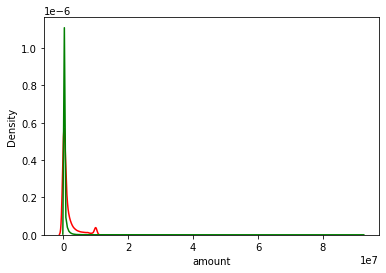

In [10]:
#plot transaction amount for both fraud and legitimate transactions as kde
sns.kdeplot(fraud_trans.amount,color='red')
sns.kdeplot(legit_trans.amount,color='green')

# Log transformation of numerical variables

From the data wrangling notebook, we saw that all amount and balance fields were strongly right skewed. We again should do a log transformation to get a more centered distribution and to more clearly see the differences between the fraudulent and legitimate transactions.

To reaffirm our assertion of the skewed plots, we show the pair plot for all numerical variables.

In [7]:
fraud_detection_ft_numeric = fraud_detection_ft.select_dtypes(include=['float64'])
fraud_detection_ft_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
dtypes: float64(5)
memory usage: 126.8 MB


array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>],
       [<AxesSubplot:title={'center':'newbalanceDest'}>, <AxesSubplot:>]],
      dtype=object)

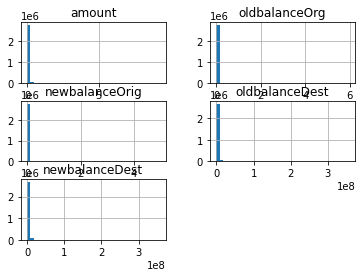

In [12]:
#histograms for float64 variables
fraud_detection_ft_numeric.hist(bins=40)

In [13]:
fraud_detection_ft_numeric.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,3.175361e+05,4.764308e+04,1.609190e+04,1.703551e+06,2.049734e+06
std,8.877897e+05,2.513251e+05,1.512558e+05,4.225550e+06,4.676990e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.297354e+04,0.000000e+00,0.000000e+00,1.280734e+05,3.272891e+05
50%,1.712609e+05,3.039600e+02,0.000000e+00,5.557100e+05,8.280539e+05
75%,3.067912e+05,3.099700e+04,0.000000e+00,1.735900e+06,2.122198e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>],
       [<AxesSubplot:title={'center':'newbalanceDest'}>, <AxesSubplot:>]],
      dtype=object)

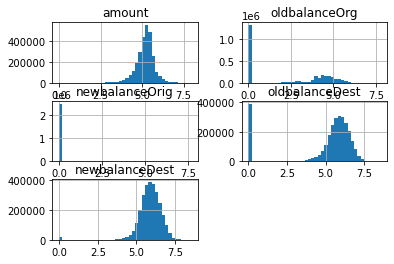

In [14]:
fraud_detection_ft_numeric_log = fraud_detection_ft_numeric.applymap(lambda x : np.log10(x+1)) #add small constant to avoid inf for log
fraud_detection_ft_numeric_log.hist(bins=40)

The log-transformed numerical variables now have a more centered distribution (with outliers to the far left of the plot for where the value was 0). 

In [15]:
fraud_detection_ft_numeric_log.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,0.010074,-0.284212,0.054126,0.351769
oldbalanceOrg,0.010074,1.000000,0.426854,-0.403433,-0.254077
newbalanceOrig,-0.284212,0.426854,1.000000,-0.098118,-0.157719
oldbalanceDest,0.054126,-0.403433,-0.098118,1.000000,0.584618
newbalanceDest,0.351769,-0.254077,-0.157719,0.584618,1.000000


<AxesSubplot:>

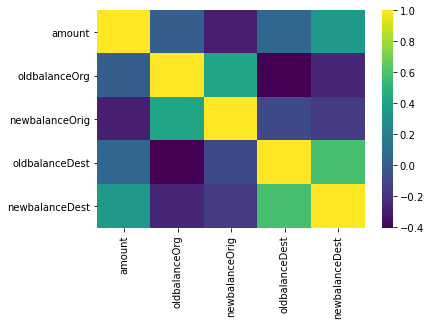

In [16]:
sns.heatmap(fraud_detection_ft_numeric_log.corr(),cmap='viridis')

There are some moderate correlations between the newbalanceOrig and oldbalanceOrig, which makes sense as most transfer amounts are probably small relative to the entire balance. We will check this later.
Same is true for  newbalanceDest and oldbalanceDest.

Amount is negatively correlated with newblanceOrig and somewhat postively correlated with newblanceDest. Again, this makes logical sense as money is being transferred from the originator to the destination.

In [17]:
#fraud_detection_ft_log = fraud_detection_ft.copy()
#fraud_detection_ft_log[fraud_detection_ft_numeric.columns] = fraud_detection_ft_numeric_log

# Transaction Amount
Does the mean transaction amount differ for fraud vs legitimate transactions?

In [8]:
#data frame for only isFraud and amount (non-zero amounts only)
fraud_amount = fraud_detection_ft[['isFraud','amount']][fraud_detection_ft.amount>0]
fraud_amount.head()

,isFraud,amount
2,1,181.00
3,1,181.00
15,0,229133.94
19,0,215310.30
24,0,311685.89


<AxesSubplot:xlabel='amount', ylabel='Density'>

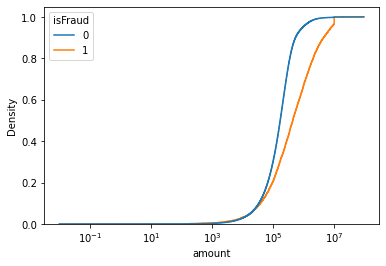

In [135]:
#plot CDF for amounts of fraud vs legitimate transactions
sns.histplot(data=fraud_amount,x='amount',hue='isFraud',log_scale=True,cumulative=True,fill=False,stat='density',common_norm=False,element='step')

In [137]:
fraud_amount.groupby('isFraud').describe().T

isFraud                  0             1
amount count  2.762196e+06  8.197000e+03
       mean   3.141155e+05  1.470833e+06
       std    8.771441e+05  2.405723e+06
       min    1.000000e-02  6.380000e+01
       25%    8.290823e+04  1.275643e+05
       50%    1.710345e+05  4.422902e+05
       75%    3.059942e+05  1.525742e+06
       max    9.244552e+07  1.000000e+07

The CDF and statistical summary data on amount indicate that fraudulent transactions have a distinctly different distribution starting around 100,000+ amounts (recall that at 200K, fraud is automatically flagged by the mobile money transfer company). Futhermore, much higher mean amount (1.47M vs 0.314M) are observed in fraud compared to legitimate transactions.

Let's see how statistically significant the difference between the two CDF curves is.

In [11]:
#Empirical CDF
#function taken from https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [12]:
#permutation function
#function taken from https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

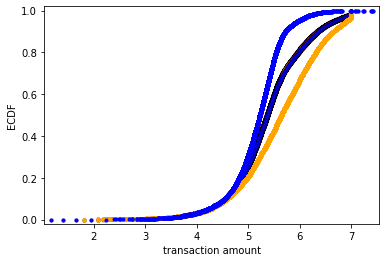

In [19]:
#graph permutation sample ECDF
#function taken from https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2
fraud_amt = fraud_amount[fraud_amount.isFraud==1]['amount'].map(np.log10)
legit_amt = fraud_amount[fraud_amount.isFraud==0]['amount'].map(np.log10).sample(len(fraud_amt))
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(fraud_amt,legit_amt)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='orange', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(fraud_amt)
x_2, y_2 = ecdf(legit_amt)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='orange')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('transaction amount')
_ = plt.ylabel('ECDF')
plt.show()

The premuted empirical CDF function lies well between the fraud and legitimate transaction amount CDFs at amounts greater than about 10^5. Therefore, we can conclude that the upper ends of the amount distributions differ with statistical significance between fraud and legitimate transactions.

# Analysis accounting for transaction type and fraud determination

In [26]:
#without log transformation 
fraud_detection_ft.drop(columns='step').groupby(['isFraud','type']).agg(['mean','std']).T

isFraud                         0                           1              
type                     CASH_OUT      TRANSFER      CASH_OUT      TRANSFER
amount         mean  1.739172e+05  9.062290e+05  1.455103e+06  1.480892e+06
               std   1.312222e+05  1.874155e+06  2.393842e+06  2.414890e+06
oldbalanceOrg  mean  4.342923e+04  4.055876e+04  1.453869e+06  1.846374e+06
               std   1.338802e+05  1.406186e+05  2.394506e+06  4.404157e+06
newbalanceOrig mean  1.750626e+04  7.380372e+03  7.258688e+01  3.856046e+05
               std   1.092919e+05  9.402846e+04  4.656888e+03  2.769842e+06
oldbalanceDest mean  1.498519e+06  2.587490e+06  1.084918e+06  1.073383e+03
               std   3.631698e+06  6.056945e+06  4.650482e+06  3.996103e+04
newbalanceDest mean  1.689744e+06  3.582075e+06  2.549545e+06  3.981411e+03
               std   3.659342e+06  7.409534e+06  5.220285e+06  7.920767e+04

From the above table, it looks like there are distinct differences between the means of the numeric columns for both type and isFraud for all numerical values. However, the high standard deviations make these differences suspect in terms of statistical significance.

Let's look at the picture with the log transformation.

In [31]:
#classify amount as zero or non-zero
def is_zero(x):
    if x == 0:
        return('zero')
    else:
        return('non-zero')

zero_labels = fraud_detection_ft[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].applymap(is_zero)

In [32]:
zero_labels.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,non-zero,non-zero,zero,zero,zero
3,non-zero,non-zero,zero,non-zero,zero
15,non-zero,non-zero,zero,non-zero,non-zero
19,non-zero,non-zero,zero,non-zero,zero
24,non-zero,non-zero,zero,non-zero,non-zero


In [34]:
#combine with type and fraud labels
zero_df = pd.merge(fraud_detection_ft[['isFraud','type']],zero_labels,how='inner',left_index=True,right_index=True)
zero_df.head()

,isFraud,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,TRANSFER,non-zero,non-zero,zero,zero,zero
3,1,CASH_OUT,non-zero,non-zero,zero,non-zero,zero
15,0,CASH_OUT,non-zero,non-zero,zero,non-zero,non-zero
19,0,TRANSFER,non-zero,non-zero,zero,non-zero,zero
24,0,TRANSFER,non-zero,non-zero,zero,non-zero,non-zero


In [35]:
#look at counts of zero/non-zero transactions by fraud and transaction types
zero_df[['isFraud','type','amount']].value_counts()

isFraud  type      amount  
0        CASH_OUT  non-zero    2233384
         TRANSFER  non-zero     528812
1        CASH_OUT  non-zero       4100
         TRANSFER  non-zero       4097
         CASH_OUT  zero             16
dtype: int64

In [48]:
#examine counts of zero/non-zero transactions by all numerical variables for legitimate transactions
zero_df[zero_df.isFraud == 0].value_counts()

isFraud  type      amount    oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0        CASH_OUT  non-zero  zero           zero            non-zero        non-zero          1021645
                             non-zero       zero            non-zero        non-zero           686922
         TRANSFER  non-zero  zero           zero            non-zero        non-zero           282272
         CASH_OUT  non-zero  non-zero       zero            zero            non-zero           262248
                                            non-zero        non-zero        non-zero           192087
         TRANSFER  non-zero  non-zero       zero            non-zero        non-zero           167477
         CASH_OUT  non-zero  non-zero       non-zero        zero            non-zero            58003
         TRANSFER  non-zero  non-zero       zero            zero            non-zero            56582
                                            non-zero        non-zero        non-zero         

In [49]:
#examine counts of zero/non-zero transactions by all numerical variables for fraudulent transactions
zero_df[zero_df.isFraud == 1].value_counts()

isFraud  type      amount    oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
1        TRANSFER  non-zero  non-zero       zero            zero            zero              3910
         CASH_OUT  non-zero  non-zero       zero            non-zero        non-zero          2819
                                                            zero            non-zero          1242
         TRANSFER  non-zero  non-zero       non-zero        zero            zero               158
                                            zero            zero            non-zero            23
         CASH_OUT  non-zero  non-zero       zero            non-zero        zero                15
                             zero           zero            non-zero        non-zero            12
                   zero      zero           zero            non-zero        non-zero            10
                   non-zero  zero           zero            zero            non-zero             9
                  

The above tables show that almost all fraudulent transactions empty the originator's account (oldblanceOrg is non-zero and newbalanceOrig is zero). The destination balances seem less correlated with fraud (but this is also because the destination balances are not updated for each transaction, but rather with only each step (see Data Wrangling notebook)).
Let's drop the Dest balances for a clearer look:

In [51]:
#drop Dest balances
zero_df.drop(columns=['oldbalanceDest','newbalanceDest','type'])[zero_df.isFraud == 1].value_counts()

isFraud  amount    oldbalanceOrg  newbalanceOrig
1        non-zero  non-zero       zero              8012
                                  non-zero           160
                   zero           zero                25
         zero      zero           zero                16
dtype: int64

In [52]:
#drop Dest balances
zero_df.drop(columns=['oldbalanceDest','newbalanceDest','type'])[zero_df.isFraud == 0].value_counts()

isFraud  amount    oldbalanceOrg  newbalanceOrig
0        non-zero  zero           zero              1308541
                   non-zero       zero              1180062
                                  non-zero           273593
dtype: int64

Effectively all fraudulent transactions drain the originator's account starting from a non-zero amount 8012/80213 = ~ 98% of the time. 

For the legitimate transactions, this occurs 1180062 / 2762196 = ~43% of the time.

How statistically significant is this result? Let's find out

In [37]:
#first, create indicator for non-zero amount, non-zero oldbalanceOrg, and zero newbalanceOrg
def balance_amount_classifier(amount,oldbalance,newbalance):
    if (amount == 'non-zero') & (oldbalance == 'non-zero') & (newbalance == 'zero'):
        return(1)
    else:
        return(0)

In [38]:
zero_df['drain_Orig_account'] = np.vectorize(balance_amount_classifier)(zero_df.amount,zero_df.oldbalanceOrg, zero_df.newbalanceOrig)

In [39]:
zero_df.head()

,isFraud,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,drain_Orig_account
2,1,TRANSFER,non-zero,non-zero,zero,zero,zero,1
3,1,CASH_OUT,non-zero,non-zero,zero,non-zero,zero,1
15,0,CASH_OUT,non-zero,non-zero,zero,non-zero,non-zero,1
19,0,TRANSFER,non-zero,non-zero,zero,non-zero,zero,1
24,0,TRANSFER,non-zero,non-zero,zero,non-zero,non-zero,1


In [94]:
zero_df.groupby('isFraud')['drain_Orig_account'].mean()

isFraud
0    0.427219
1    0.975527
Name: drain_Orig_account, dtype: float64

In [95]:
obs_diff = zero_df[zero_df.isFraud == 1]['drain_Orig_account'].mean() - zero_df[zero_df.isFraud == 0]['drain_Orig_account'].mean()
obs_diff

0.54830782606149

In [84]:
#Permute the balance classified label and calculate means
#takes a long time...
difference = []
for i in range(100):
    zero_df['Permutation1'] = np.random.permutation(zero_df.balance_classified)
    diff_mean = zero_df[zero_df.isFraud == 1]['Permutation1'].mean() - zero_df[zero_df.isFraud == 0]['Permutation1'].mean()
    difference.append(diff_mean)

(array([ 5.,  5., 11., 17., 20., 16., 11.,  7.,  5.,  3.]),
 array([-0.01222398, -0.00947627, -0.00672857, -0.00398086, -0.00123316,
         0.00151455,  0.00426225,  0.00700996,  0.00975766,  0.01250537,
         0.01525307]),
 <BarContainer object of 10 artists>)

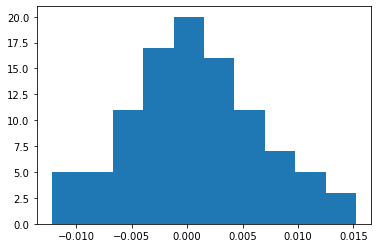

In [86]:
plt.hist(difference)

In [87]:
sum([d >= obs_diff for d in difference])/len(difference)

0.0

That the mean of fraudulent transactions that completely drain the originator's account of 98% is significantly (and practically) different from the average of 43% of legitimate transactions. 

From our 100 permutations, no differences was as extreme as the observed difference. In fact, the observed difference is about 36 times greater than even the most extreme simulated difference from the permuations. 

# Analysis for Transactor Type (Customer or Merchant)

A transactor (either sender or recipient) can be either a customer or a merchant. This is gleaned from the first letter in the strings for the nameOrig and nameDest columns. Strings starting with a "C" denote customers whereas strings starting with a "M" denote merchants.

Are either type of originator or recipient more likley to be involved in fraud?

In [102]:
#regex package
import re

In [109]:
#define function to classify
def transactor_type(name):
    if re.match('C',name):
        return('Customer')
    else:
        return('Merchant')

In [112]:
fraud_detection_transactor_type = fraud_detection[['isFraud','type','nameOrig','nameDest']]
fraud_detection_transactor_type.head()

,isFraud,type,nameOrig,nameDest
0,0,PAYMENT,C1231006815,M1979787155
1,0,PAYMENT,C1666544295,M2044282225
2,1,TRANSFER,C1305486145,C553264065
3,1,CASH_OUT,C840083671,C38997010
4,0,PAYMENT,C2048537720,M1230701703


In [114]:
fraud_detection_transactor_type['orig_type'] = fraud_detection_transactor_type['nameOrig'].apply(transactor_type)
fraud_detection_transactor_type['dest_type'] = fraud_detection_transactor_type['nameDest'].apply(transactor_type)

<ipython-input-114-1eb94a8fa362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_detection_transactor_type['orig_type'] = fraud_detection_transactor_type['nameOrig'].apply(transactor_type)
<ipython-input-114-1eb94a8fa362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_detection_transactor_type['dest_type'] = fraud_detection_transactor_type['nameDest'].apply(transactor_type)


In [116]:
fraud_detection_transactor_type.head()

,isFraud,type,nameOrig,nameDest,orig_type,dest_type
0,0,PAYMENT,C1231006815,M1979787155,Customer,Merchant
1,0,PAYMENT,C1666544295,M2044282225,Customer,Merchant
2,1,TRANSFER,C1305486145,C553264065,Customer,Customer
3,1,CASH_OUT,C840083671,C38997010,Customer,Customer
4,0,PAYMENT,C2048537720,M1230701703,Customer,Merchant


In [122]:
fraud_detection_transactor_type.drop(columns=['nameOrig','nameDest'],inplace=True)

In [123]:
fraud_detection_transactor_type.value_counts()

isFraud  type      orig_type  dest_type
0        CASH_OUT  Customer   Customer     2233384
         PAYMENT   Customer   Merchant     2151495
         CASH_IN   Customer   Customer     1399284
         TRANSFER  Customer   Customer      528812
         DEBIT     Customer   Customer       41432
1        CASH_OUT  Customer   Customer        4116
         TRANSFER  Customer   Customer        4097
dtype: int64

Our analysis shows that fraud occurs only between two customers and never involve a merchant. Therefore, we can drop all records where a merchant is involved. We already do this implicitly by excluding transaction type of PAYMENT (the only type of transaction that a merchant is ever part of) since only CASH_OUT and TRANSFER are involved in fraudulent transactions anyway.

So, it looks like the nameOrig and nameDest columns are not useful for detecting fraud in this data set. We already established that there are very few "repeat" customers in the data set, so no social network analysis or history can really be taken into account.

# Final feature set

From the analysis we did above, the final set of features can be limited to the transaction type, transaction amount, and the feature engineered field "drain_Orig_account" which is 1 for transactions leaving newbalanceOrig as zero with a non-zero oldbalanceOrg and 0 otherwise.

From our previous data wrangling notebook, we saw that step (i.e., hour) also could be used to predict fraud since fraudulent transactions followed a roughly uniform distribution with step whereas the same was not true of legitimate transaction which dropped off sharply at around 60% through the steps.

In [42]:
#prepare and print final data
final_data = pd.merge(fraud_detection_ft[['step','type','amount','isFraud']],zero_df['drain_Orig_account'],left_index=True,right_index=True)
final_data.head()

,step,type,amount,isFraud,drain_Orig_account
2,1,TRANSFER,181.00,1,1
3,1,CASH_OUT,181.00,1,1
15,1,CASH_OUT,229133.94,0,1
19,1,TRANSFER,215310.30,0,1
24,1,TRANSFER,311685.89,0,1


In [43]:
#write final data file
final_data.to_csv('../data/EDA_final_data.csv',index=False,index_label=False)